Contents
0 Import the libraries
1 Get the data
    1.1 Import csv file
    1.2 Cleaning data
2 Cleaning and Exploratory Data Analysis (EDA)
    2.1 Pandas Profiling
    2.2 Examine the different aspects of the dataframe
    2.3 Split the data into training and test sets, creating a copy of the datasets
    2.4 Merging the datasets
    2.5 Enhancement of data
    2.6 Univariate analysis 
        2.6.1 Catagory
        2.6.2 Gender
        2.6.3 amt
        2.6.4 is_fraud
    2.7 Multivariate analysis
        2.7.1 amt vs is_fruad
        2.7.2 category vs is_fruad
        2.7.3 age (dob) vs is_fraud
        2.7.4 trans_date_trans_time
        2.7.5 merchant vs home location (lat, long)
3 One-hot encoding
    3.1 Category column
    3.2 Scaling
4 Preparing test data
5 Modeling
    5.1 KNN model
    5.2 Gradient Boosting model
    5.3 Light GBM model
    5.4 Logistic Regression Model
    5.5 Random Forest model
6 Conclusion


 - Business objective


Data Understanding
Determining the objective
Data preparation
EDA
Modelling & Evaluation
Try On Test Data
Conclusion & Room for improvement

0 Import the libraries

In [487]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Missing data visualization
import missingno as msno

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical operations
import math

# Set option for displaying maximum columns in pandas
pd.set_option('display.max_columns', None)

# Set plotting style
plt.style.use('ggplot')

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from skopt import gp_minimize
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn import metrics

# Scientific computing and statistical functions
import scipy.stats as stats
from scipy.stats import skew

# Date and time manipulation
import datetime as dt

# Categorical data encoding
import category_encoders as ce

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Data profiling
from pandas_profiling import ProfileReport

# Path module for file path representation
from pathlib import Path


1 Get the data
1.1 Import csv file

In [488]:
train_data = pd.read_csv('../Credit-Card-Transactions-Fraud-Detection-Cat/fraudTrain.csv')
test_data = pd.read_csv('../Credit-Card-Transactions-Fraud-Detection-Cat/fraudTest.csv')

In [489]:
full_data = pd.concat([train_data, test_data], axis=0)

In [490]:
full_data = full_data.sample(frac=1).reset_index(drop=True)

In [491]:
full_data.shape

(1604294, 23)

1.2 Cleaning data

In [492]:
train_data.isnull().sum(),test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [493]:
test_data.head

<bound method NDFrame.head of         Unnamed: 0 trans_date_trans_time        cc_num  \
0                0       6/21/2020 12:14  2.291164e+15   
1                1       6/21/2020 12:14  3.573030e+15   
2                2       6/21/2020 12:14  3.598215e+15   
3                3       6/21/2020 12:15  3.591920e+15   
4                4       6/21/2020 12:15  3.526826e+15   
...            ...                   ...           ...   
555714      555714      12/31/2020 23:59  3.056060e+13   
555715      555715      12/31/2020 23:59  3.556613e+15   
555716      555716      12/31/2020 23:59  6.011724e+15   
555717      555717      12/31/2020 23:59  4.079770e+12   
555718      555718      12/31/2020 23:59  4.170689e+15   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitz

2 Cleaning and Exploratory Data Analysis (EDA)

2.1 Pandas Profiling

In [494]:
profile_report = ProfileReport(train_data, explorative=True, dark_mode=True)

In [495]:
profile_report_folder = Path('pandas_profile_folder/Credit_Card_Transactions_Fraud_profile.html')

if not profile_report_folder.exists():
    profile_report.to_file(profile_report_folder)

2.2 Examine the different aspects of the dataframe

In [496]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

2.3 Split the data into training and test sets, creating a copy of the datasets

In [497]:
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [498]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1048575.0,5.242870e+05,3.026977e+05,0.000000e+00,2.621435e+05,5.242870e+05,7.864305e+05,1.048574e+06
cc_num,1048575.0,4.171565e+17,1.308811e+18,6.041621e+10,1.800400e+14,3.520550e+15,4.642255e+15,4.992346e+18
amt,1048575.0,7.027910e+01,1.599518e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.305000e+01,2.894890e+04
zip,1048575.0,4.880159e+04,2.689804e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1048575.0,3.853336e+01,5.076852e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1048575.0,-9.022626e+01,1.375858e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1048575.0,8.905776e+04,3.024351e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1048575.0,1.344906e+09,1.019700e+07,1.325376e+09,1.336682e+09,1.344902e+09,1.354366e+09,1.362932e+09
merch_lat,1048575.0,3.853346e+01,5.111233e+00,1.902779e+01,3.472954e+01,3.936295e+01,4.195602e+01,6.751027e+01
merch_long,1048575.0,-9.022648e+01,1.377093e+01,-1.666712e+02,-9.689864e+01,-8.743923e+01,-8.023228e+01,-6.695090e+01


In [499]:
train_data.shape

(1048575, 23)

In [500]:
test_data.shape

(555719, 23)

In [501]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [502]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [503]:
pd.set_option('display.max_columns', None)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [504]:
train_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [505]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [506]:
test_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [507]:
full_data = train_data

In [508]:
full_data.shape

(1048575, 23)

In [509]:
X_train = train_data.drop('is_fraud',axis=1)
X_test = test_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

2.4 Merging the datasets

In [510]:
# Merge the datasets (concatenate rows)
merged_data = pd.concat([train_data, test_data], axis=0)

# Reset the index 
# This line resets the index of the merged dataset. 'drop=True' ensures that the old index is not saved as a column.
# 'inplace=True' ensures that the changes are made directly to the merged_data DataFrame.
merged_data.reset_index(drop=True, inplace=True)

# Save the merged dataset to a new CSV file
# This line saves the merged dataset to a new CSV file named 'mergeddata.csv' in the specified directory.
# 'index=False' ensures that the index is not saved as a separate column in the CSV file.
merged_data.to_csv('../Credit-Card-Transactions-Fraud-Detection-Cat/mergeddata.csv', index=False)


In [511]:
#Reading the merged dataset
df = pd.read_csv('../Credit-Card-Transactions-Fraud-Detection-Cat/mergeddata.csv')

In [512]:
df.shape

(1604294, 23)

In [513]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


From the information provided, it is evident that the dataset contains 17 features and 1,604,294 rows.

In [514]:
#Inspect the various aspects of the dataframe after merged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1604294 non-null  int64  
 1   trans_date_trans_time  1604294 non-null  object 
 2   cc_num                 1604294 non-null  float64
 3   merchant               1604294 non-null  object 
 4   category               1604294 non-null  object 
 5   amt                    1604294 non-null  float64
 6   first                  1604294 non-null  object 
 7   last                   1604294 non-null  object 
 8   gender                 1604294 non-null  object 
 9   street                 1604294 non-null  object 
 10  city                   1604294 non-null  object 
 11  state                  1604294 non-null  object 
 12  zip                    1604294 non-null  int64  
 13  lat                    1604294 non-null  float64
 14  long              

2.5 Enhancement of data

In [515]:
#Check duplicates
print("Number of duplicated values: ",df.duplicated().sum())

Number of duplicated values:  0


No duplicate values

In [516]:
#Distinctiveness
# Iterate through each column in the DataFrame 'df'
for column in df.columns:
    # Calculate the number of distinct (unique) values in each column
    num_distinct_values = len(df[column].unique())
    # Print the column name along with the number of distinct values
    print(f"{column}:    {num_distinct_values}")


Unnamed: 0:    1048575
trans_date_trans_time:    703571
cc_num:    967
merchant:    693
category:    14
amt:    57047
first:    351
last:    484
gender:    2
street:    981
city:    891
state:    51
zip:    967
lat:    965
long:    965
city_pop:    877
job:    496
dob:    966
trans_num:    1604294
unix_time:    1575410
merch_lat:    1530098
merch_long:    1572073
is_fraud:    2


The distinctiveness of all variables has been examined. Due to the presence of numerous unique values in the 'trans_date_trans_time' column, we have opted to divide the column into hour, day, and Month-year components. This decision aims to extract more valuable insights from the data, and the resulting additional columns will be appended to our original dataframe. Additionally, there are missing values that need to be addressed.

In [517]:
# Check for null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

As we can see, there is no missing values

In [518]:
#Check unique values in a specific column
unique_values = df['is_fraud'].unique()
print(unique_values)

[0 1]


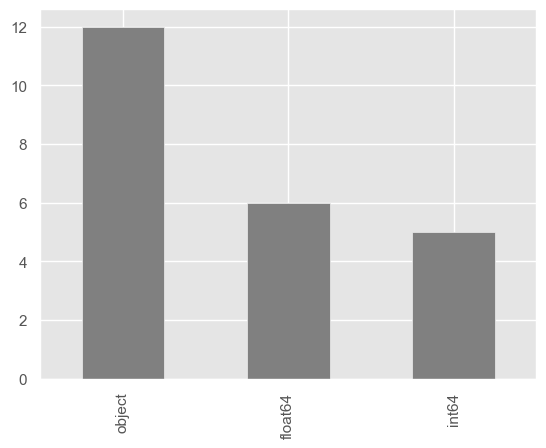

In [519]:
train_data.dtypes.value_counts().plot(kind='bar', color="grey");

The graph illustrates that the 'int64' datatype has the highest count, while the 'float64' datatype has the lowest count.

2.6 Univariate analysis 

2.6.1 Category

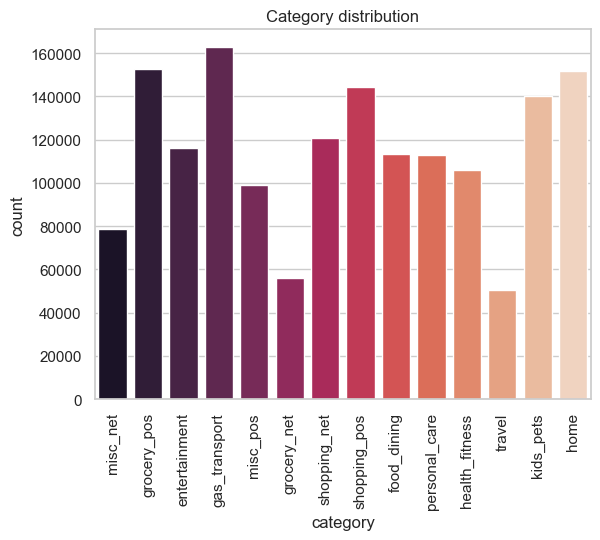

In [520]:
sns.set(style="whitegrid")
sns.countplot(x='category', data=df, palette="rocket")
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

Higest transaction are fgor gas tarnsaction that is over 160,000

2.6.2 Gender

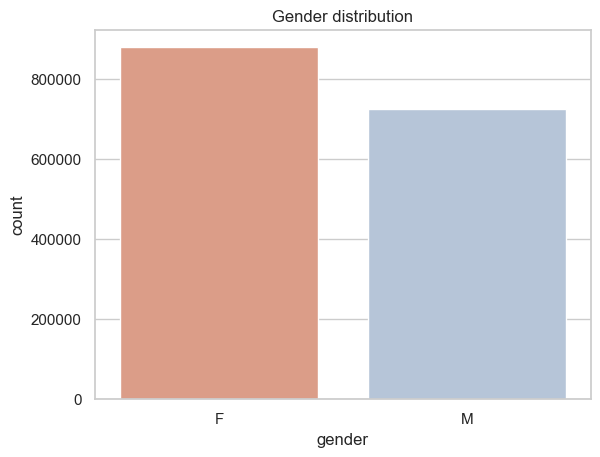

<Figure size 400x400 with 0 Axes>

In [521]:
custom_palette = ["DarkSalmon", "LightSteelBlue"]
sns.countplot(x='gender', data=df, palette=custom_palette)
plt.title('Gender distribution')
plt.figure(figsize=(4, 4))
plt.show()

The number of fraudulent transactions is higher among females than males.

2.6.3 amt

In [522]:
amt_train_data, amt_test_data = data_split(full_data, 0.2)

In [523]:
amt_train_copy, amt_test_copy = amt_train_data.copy(), amt_test_data.copy()

In [524]:
amt_train_copy.shape

(838860, 23)

In [525]:
amt_test_copy.shape

(209715, 23)

In [526]:
amt_train_copy.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,408561,7/4/2019 10:55,3.805750e+13,"fraud_Schaefer, Maggio and Daugherty",gas_transport,53.80,Marissa,Clark,F,2677 Byrd Village Suite 035,San Jose,CA,95148,37.3304,-121.7913,973849,Geoscientist,1/18/1997,d72d8a494a317d28f83915fd15ef5791,1341399332,37.380979,-121.892287,0
1,70143,2/11/2019 7:51,3.443420e+14,fraud_Pagac LLC,shopping_pos,1.25,Ruth,Fuller,F,37732 Joe Courts Apt. 752,Darien,GA,31305,31.3826,-81.4312,5989,Tax adviser,5/5/1967,afa716b2348041569f96969ad8a511b8,1328946700,31.429471,-82.400891,0
2,708782,10/29/2019 9:13,3.023500e+13,fraud_Morar Inc,grocery_net,86.08,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,New Holstein,WI,53061,43.9446,-88.0911,5196,Child psychotherapist,1/22/1978,a87f38d49090ade2ea7b58078cc4f07a,1351502032,44.396949,-87.142823,0
3,572694,8/31/2019 16:46,3.533177e+15,fraud_Ziemann-Waters,health_fitness,38.11,Derek,Bentley,M,782 Lee Crossing Apt. 209,Weeping Water,NE,68463,40.8731,-96.1528,1517,Dealer,11/8/1951,4c6fee28bf4f4494a6937a78cad8edf6,1346431581,40.649509,-96.406846,0
4,774181,11/27/2019 17:02,3.401030e+14,fraud_White and Sons,home,32.48,Sophia,Dickson,F,9047 Rodriguez Turnpike,Gibsonville,NC,27249,36.1183,-79.5685,12486,Arboriculturist,2/9/1934,554cf6379fcf09371e99e0ce78d4a5df,1354035758,36.384054,-78.620207,0


In [527]:
amt_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838860 entries, 0 to 838859
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             838860 non-null  int64  
 1   trans_date_trans_time  838860 non-null  object 
 2   cc_num                 838860 non-null  float64
 3   merchant               838860 non-null  object 
 4   category               838860 non-null  object 
 5   amt                    838860 non-null  float64
 6   first                  838860 non-null  object 
 7   last                   838860 non-null  object 
 8   gender                 838860 non-null  object 
 9   street                 838860 non-null  object 
 10  city                   838860 non-null  object 
 11  state                  838860 non-null  object 
 12  zip                    838860 non-null  int64  
 13  lat                    838860 non-null  float64
 14  long                   838860 non-nu

In [528]:
amt_train_copy.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,8.388600e+05,8.388600e+05,838860.000000,838860.00000,838860.000000,838860.000000,8.388600e+05,8.388600e+05,838860.000000,838860.000000,838860.000000
mean,5.243137e+05,4.170812e+17,70.350637,48820.44496,38.530534,-90.232168,8.938025e+04,1.344907e+09,38.530283,-90.232595,0.005752
std,3.026395e+05,1.308726e+18,163.356552,26896.83624,5.074271,13.754817,3.031695e+05,1.019509e+07,5.108506,13.766364,0.075623
min,1.000000e+00,6.041621e+10,1.000000,1257.00000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.034282,-166.671242,0.000000
25%,2.623888e+05,1.800400e+14,9.640000,26237.00000,34.620500,-96.798000,7.430000e+02,1.336692e+09,34.728974,-96.907566,0.000000
50%,5.241675e+05,3.520550e+15,47.420000,48174.00000,39.354300,-87.476900,2.456000e+03,1.344897e+09,39.361275,-87.446719,0.000000
75%,7.865295e+05,4.642255e+15,83.090000,72042.00000,41.894800,-80.158000,2.047800e+04,1.354367e+09,41.949866,-80.236458,0.000000
max,1.048574e+06,4.992346e+18,28948.900000,99783.00000,66.693300,-67.950300,2.906700e+06,1.362932e+09,67.510267,-66.950902,1.000000


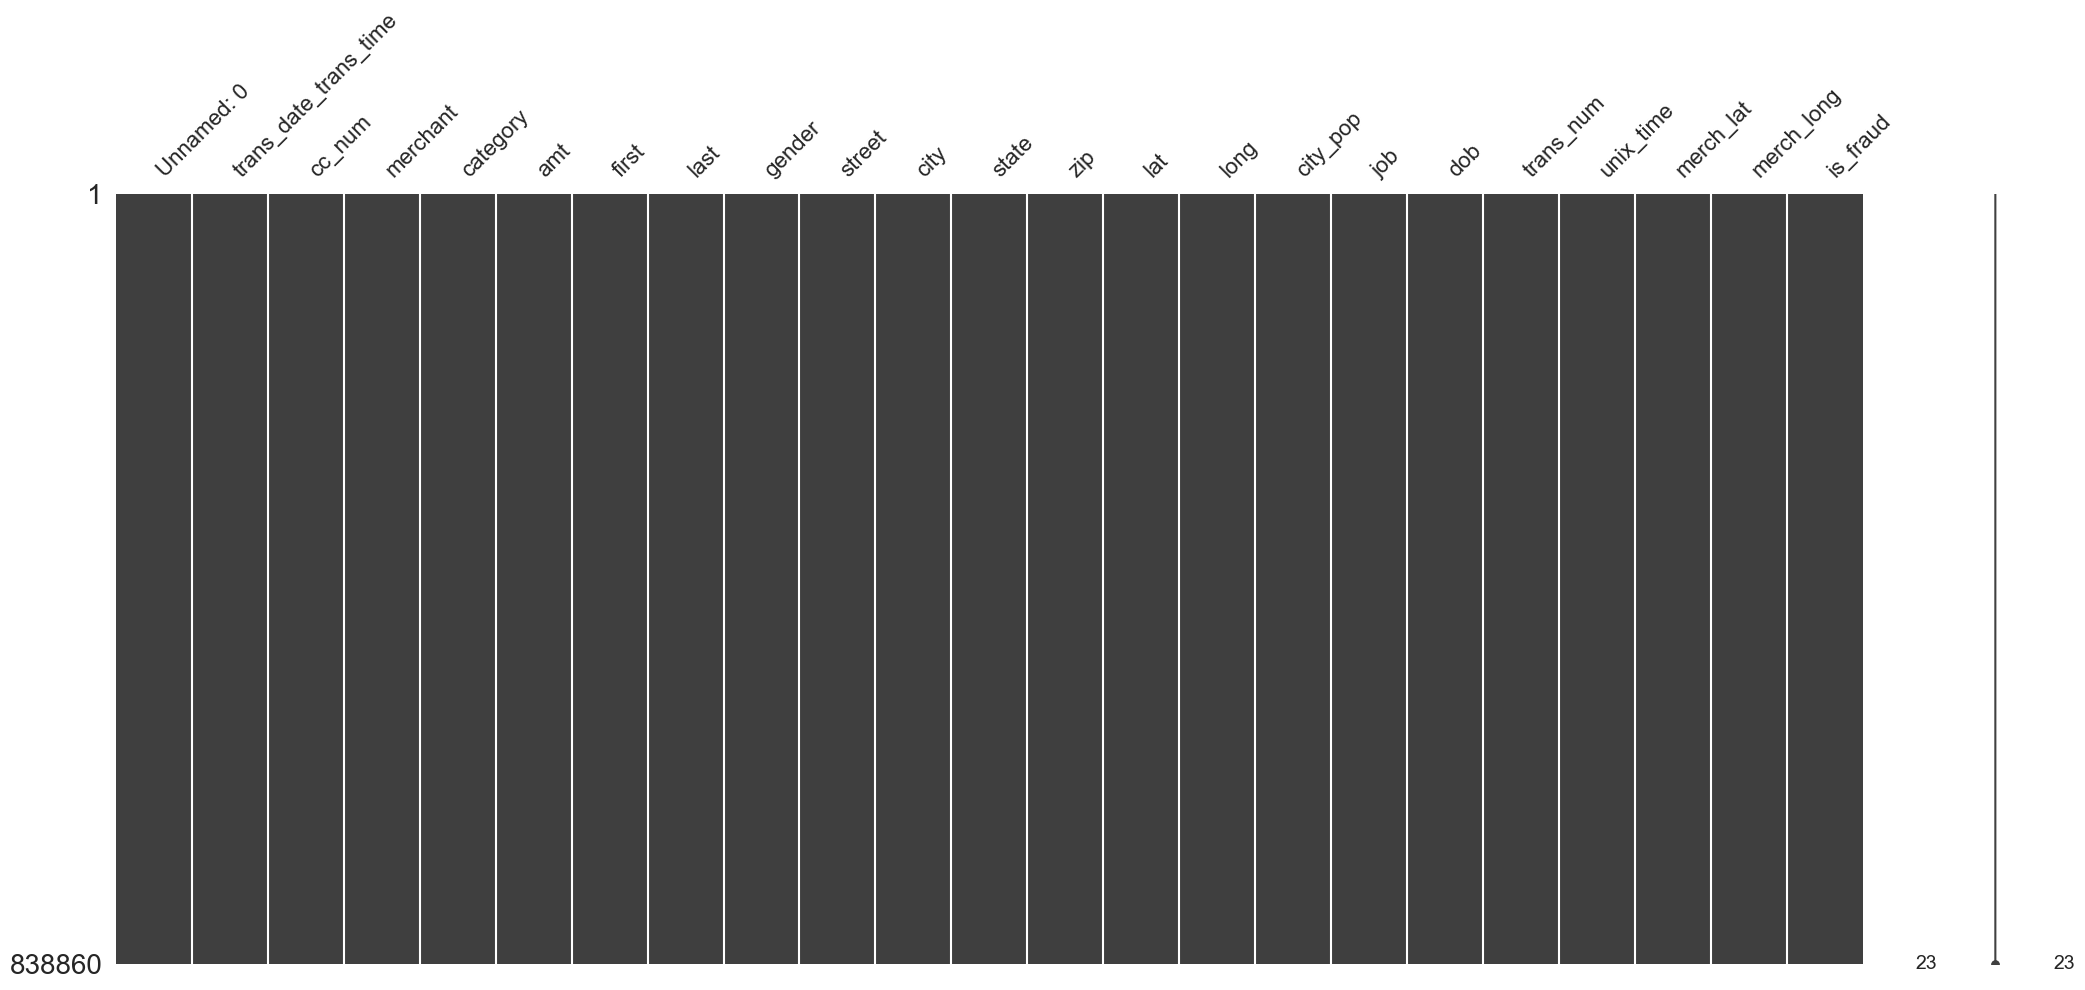

In [529]:
msno.matrix(amt_train_copy)
plt.show()

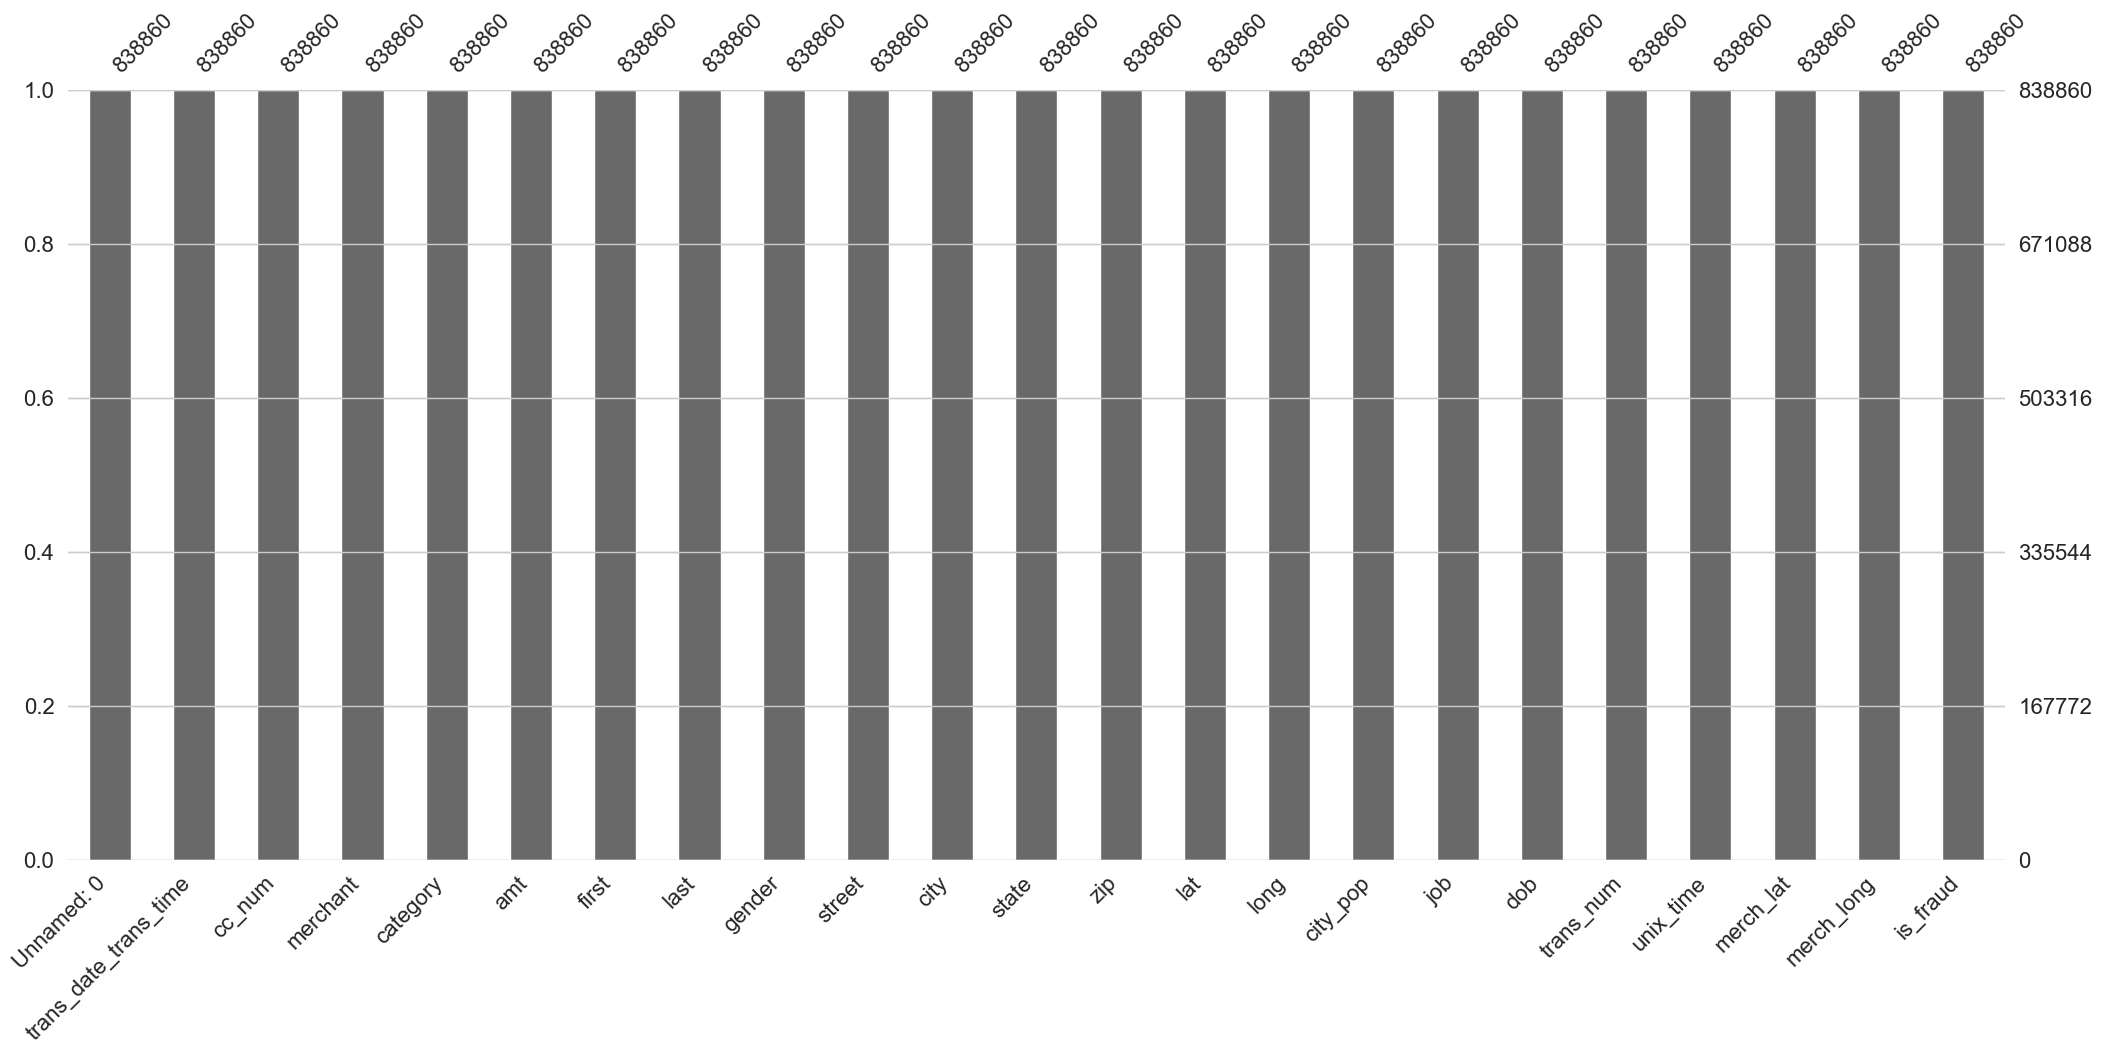

In [530]:
msno.bar(amt_train_copy)
plt.show()

In [531]:
train_data["amt"].describe()

count    1.048575e+06
mean     7.027910e+01
std      1.599518e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.305000e+01
max      2.894890e+04
Name: amt, dtype: float64

2.6.4 is_fraud

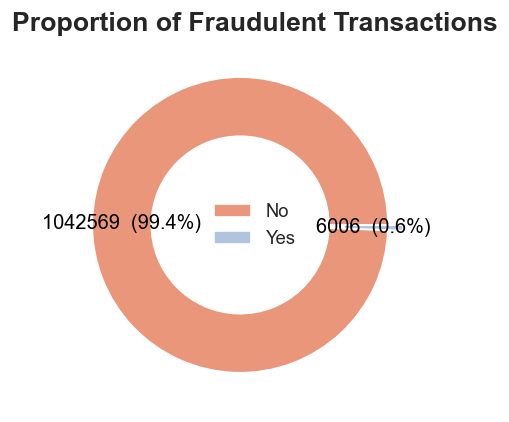

In [532]:
# Calculate the count of each category
doughnut_chart = train_data["is_fraud"].value_counts().reset_index()
doughnut_chart.columns = ['is_fraud', 'count']

labels = ["No", "Yes"]
explode = (0.1, 0)
colors = ['DarkSalmon', 'LightSteelBlue']

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
wedges, texts, autotexts = plt.pie(doughnut_chart["count"], autopct="%1.1f%%", pctdistance=0.8, explode=explode, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proportion of Fraudulent Transactions", {'fontsize': 16, 'fontweight': 'bold'})  # Modify the title here
plt.legend(labels, loc="center", frameon=False)

# Adding count numbers and percentage values inside the plot
for autotext in autotexts:
    autotext.set_color('white')

for i, a in enumerate(autotexts):
    a.set_text(f"{doughnut_chart['count'].iloc[i]}  ({doughnut_chart['count'].iloc[i]*100/doughnut_chart['count'].sum():.1f}%)")
    a.set_color('black')

plt.show()


The results indicate a highly imbalanced dataset, with a significantly larger number of non-fraudulent values compared to the fewer instances of fraudulent values.

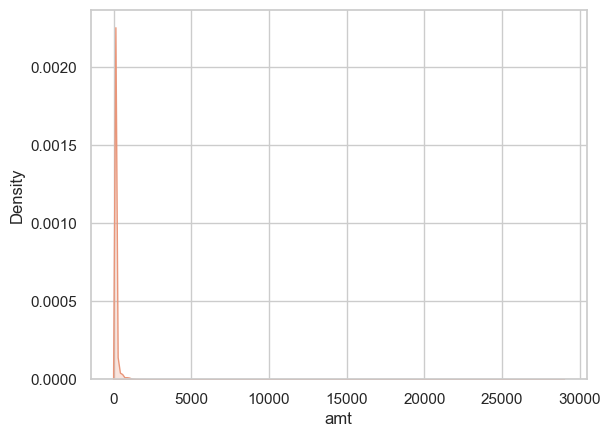

In [533]:
#Check the distribution of the amount ("amt") feature.
sns.kdeplot(train_data["amt"], fill=True, color='DarkSalmon');


The distortion in the graph is caused by the higher values of the 'amount.' To rectify this, we are plotting only the range from 0% to 99% of the amount.

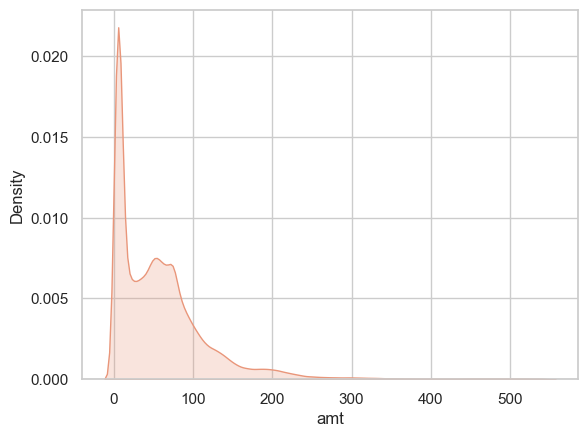

In [534]:
#Calculate the 99th percentile of the 'amt' column with create a KDE plot using Seaborn to visualize the distribution of the 'amt' values
p99 = train_data["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=train_data[train_data["amt"] <= p99], fill=True, color='DarkSalmon');

Examine whether there is any noticeable pattern between the target variable (is_fraud) and the transaction amount.

2.7 Multivariate analysis

2.7.1 amt vs is_fraud

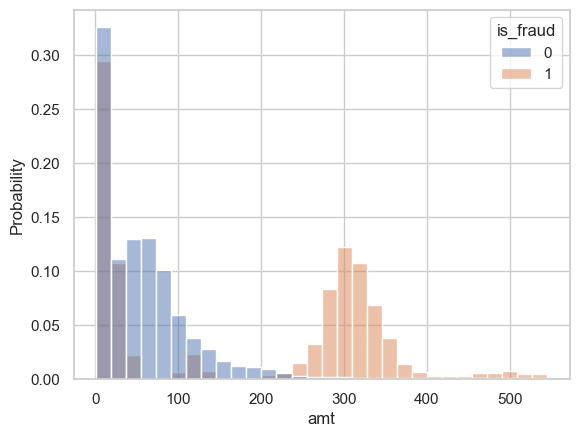

In [535]:
#Calculate the 99th percentile of the 'amt' column with create a histogram with Seaborn to visualize the 'amt' values. The 'hue' parameter colors the bars based on the 'is_fraud' column 'bins' sets the number of bins for the histogram 'stat' is set to "probability" to show the proportions on the y-axis. The 'data' parameter filters the data to include only values where 'amt' is less than or equal to the 99th percentile 'common_norm' is set to False to ensure that each histogram is independently normalized.
p99 = train_data["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30, stat="probability", data=train_data[train_data["amt"] <= p99], common_norm=False);

Observe that the probability distribution varies distinctly for each 'is_fraud' value. 

2.7.2 category vs is_fraud

We can broaden this analysis to encompass each transaction category:

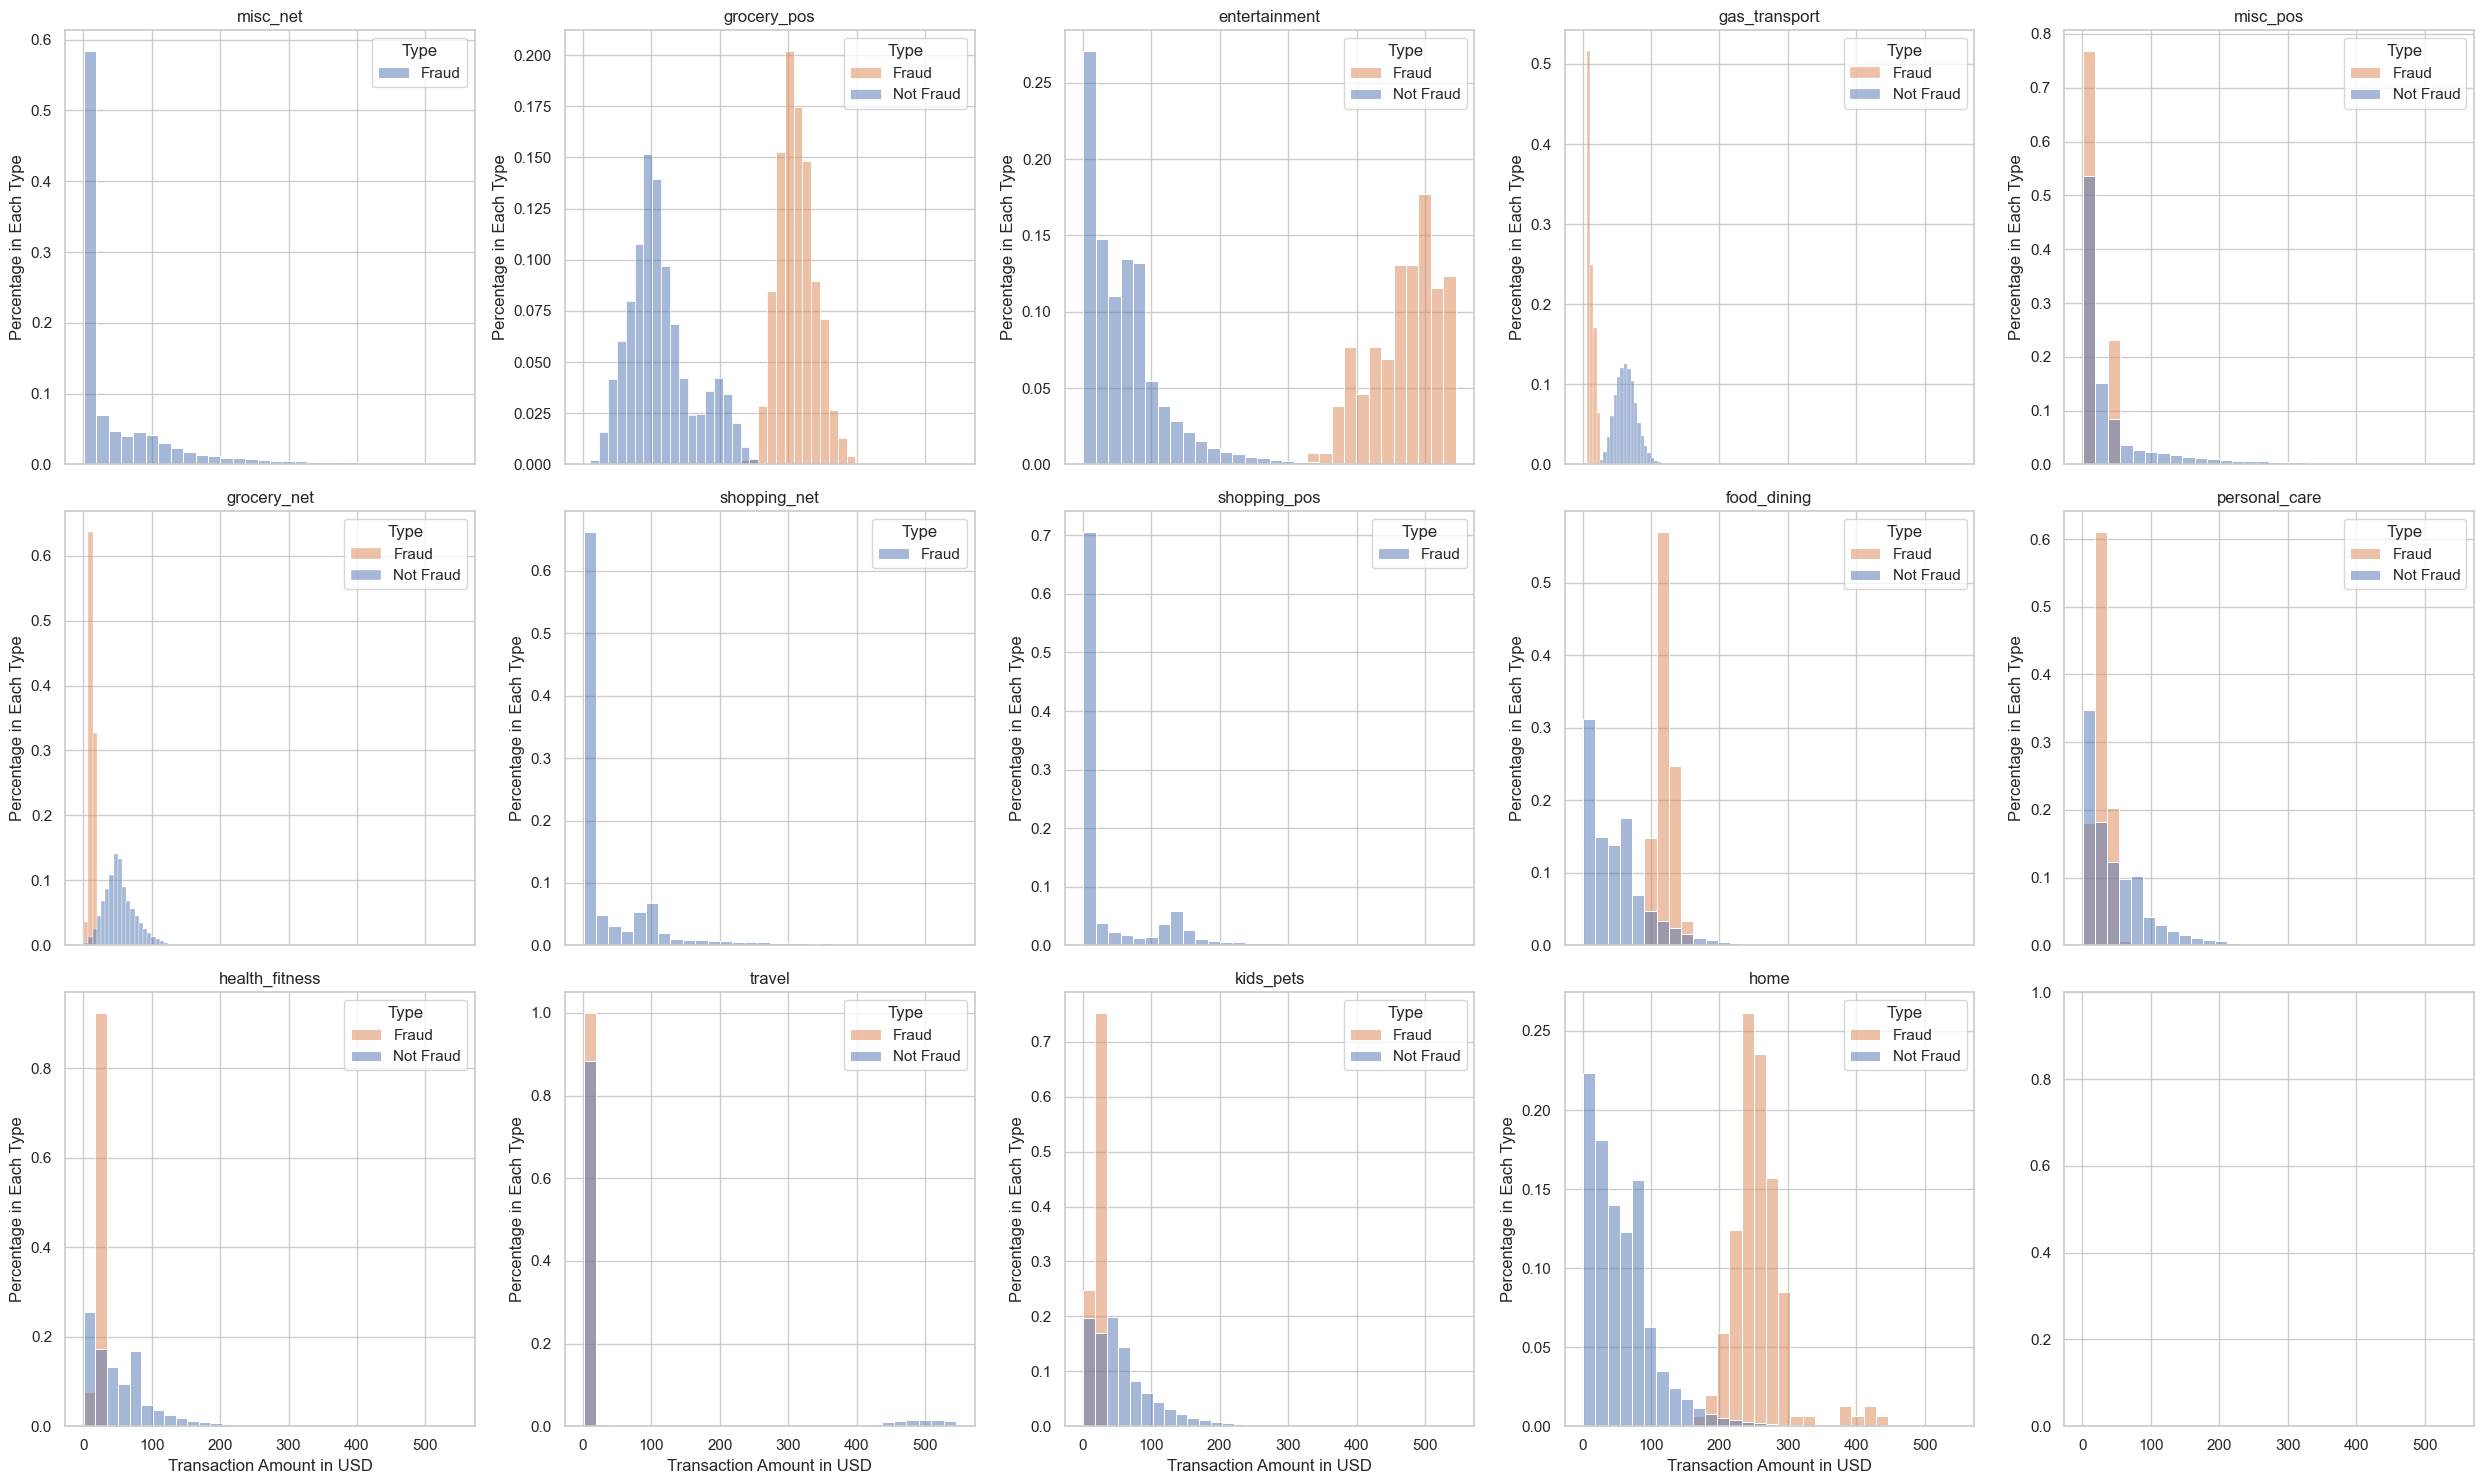

In [536]:
#Getting unique categories from the 'category' column in the DataFrame
categories = train_data['category'].unique()

#Calculating the number of plots, rows, and columns for the subplots
num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

#Creating subplots based on the number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows), sharex=True)

#Iterating through each category and plotting the histogram for each category
for i, category in enumerate(categories):

    #Calculating the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    #Extracting data for the current category
    data_category = train_data[train_data['category'] == category]

    #Handling the case of a single plot or multiple plots
    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    #Creating a histogram for the 'amt' column, based on the 'is_fraud' variable
    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    #Setting labels and title for the plot
    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

Examine the categories closely. Analyze which categories are more commonly associated with fraud. To do this, we will calculate the distribution for each category in both normal and fraudulent transactions separately. By comparing these two distributions, we can identify the categories where fraud is more prevalent.

In [537]:
#Non-Fraud Data Calculation:
non_fraud = train_data[train_data['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

#Fraud Data Calculation:
fraud = train_data[train_data['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

#Merging DataFrames and Calculating "Fraud Level":
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentual_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.101607,0.082917,-0.018690
1,home,0.095365,0.025475,-0.069891
2,grocery_pos,0.094488,0.232434,0.137946
3,shopping_pos,0.089866,0.110223,0.020358
4,kids_pets,0.087486,0.032301,-0.055185
5,shopping_net,0.074359,0.228938,0.154579
6,entertainment,0.072701,0.030803,-0.041899
7,food_dining,0.070902,0.020147,-0.050755
8,personal_care,0.070332,0.028638,-0.041694
9,health_fitness,0.066430,0.017316,-0.049114


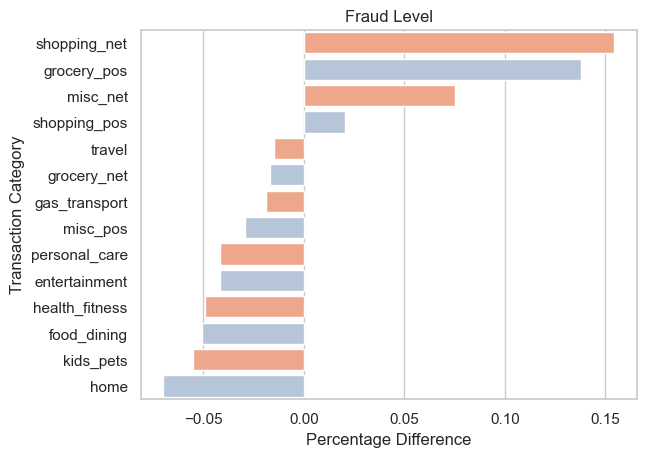

In [538]:
#Define a custom color palette using the "cividis" color scheme
custom_palette = sns.color_palette(['LightSalmon', 'LightSteelBlue'])

#Create a bar plot using Seaborn's barplot function
ax = sns.barplot(y='category', x='fraud_level',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)

#Set the x-axis and y-axis labels
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')

#Set the title of the plot
plt.title('Fraud Level')

#Display the plot
plt.show()

As shown above, certain categories are more prone to fraudulent activities than others.

2.7.3 age (dob) vs is_fraud

We will examine how the age distribution varies for fraud and non-fraud transactions.

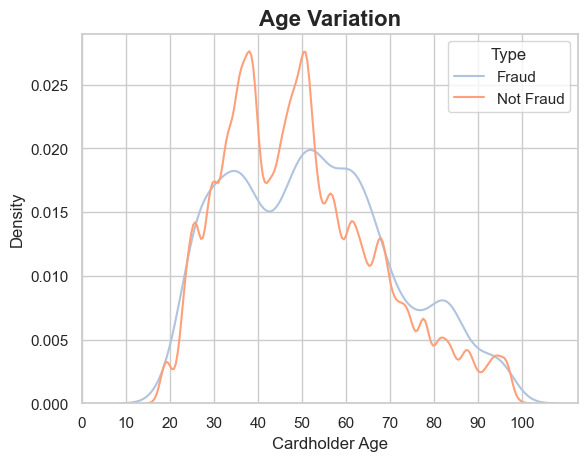

In [539]:
#Calculate the age of each credit card holder based on the date of birth
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year

#Create a kernel density estimate (KDE) plot using Seaborn's kdeplot function
custom_palette = ["LightSalmon", "LightSteelBlue"]  # Custom colors in hexadecimal format
ax = sns.kdeplot(x='age', data=train_data, hue='is_fraud', common_norm=False, palette=custom_palette)

#Set the x-axis and y-axis labels
ax.set_xlabel('Cardholder Age')
ax.set_ylabel('Density')

#Set the x-axis ticks to show intervals of 10 years
plt.xticks(np.arange(0, 110, 10))

#Set the title of the plot
plt.title('Age Variation', {'fontsize': 16, 'fontweight' : 'bold'})

#Add a legend with labels for 'Fraud' and 'Not Fraud'
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#Display the plot
plt.show()

In non-fraudulent transactions, noticeable peaks appear around 35 and 40 years, along with another peak around 50 years. In contrast, fraudulent transactions exhibit a smoother distribution, with peaks around 35 years and in the 50 to 55-year range.

Feature Engineering
#'dob' converted to :
 -age
 -age group

#dob column converted to age

In [540]:
#Convert 'DOB' to datetime if it's not already
df['dob'] = pd.to_datetime(df['dob'])
#Calculate age
current_date = pd.Timestamp('now')
df['age'] = current_date.year - df['dob'].dt.year
#Sort the DataFrame by the "age" column in ascending order
df.sort_values(by='age')
df['age']

0          35
1          45
2          61
3          56
4          37
           ..
1604289    57
1604290    24
1604291    42
1604292    58
1604293    30
Name: age, Length: 1604294, dtype: int32

#dob column converted to age group

In [541]:
#Define the age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20','21-40','41-60', '61-80', '81-100']

#Use the cut function to create the age_group feature
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

#Display the DataFrame with the new age_group feature
df['age_group']

0          21-40
1          41-60
2          61-80
3          41-60
4          21-40
           ...  
1604289    41-60
1604290    21-40
1604291    41-60
1604292    41-60
1604293    21-40
Name: age_group, Length: 1604294, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']

2.7.4 trans_date_trans_time vs is_fraud

We will analyze whether the time of day has any impact.

#'trans_date_trans_time' feature are converted to time

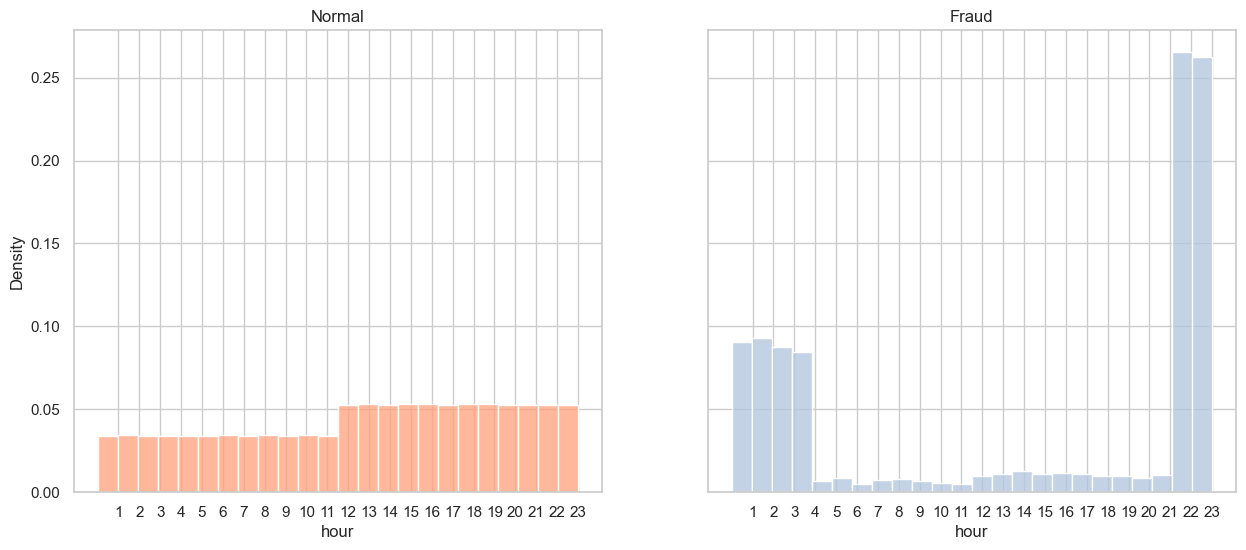

In [542]:
#Extracting the hour from the 'trans_date_trans_time' column and assigning it to a new column 'hour'
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour

#Creating subplots for the histograms
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

#Creating a histogram for non-fraudulent transactions
ax1 = sns.histplot(x='hour', data=train_data[train_data["is_fraud"] == 0], stat="density", bins=24, ax=ax1, color="LightSalmon")

#Creating a histogram for fraudulent transactions
ax2 = sns.histplot(x='hour', data=train_data[train_data["is_fraud"] == 1], stat="density", bins=24, ax=ax2, color="LightSteelBlue")

#Setting the titles for the subplots
ax1.set_title("Normal")
ax2.set_title("Fraud")

#Setting the x-axis tick marks for both subplots
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24))


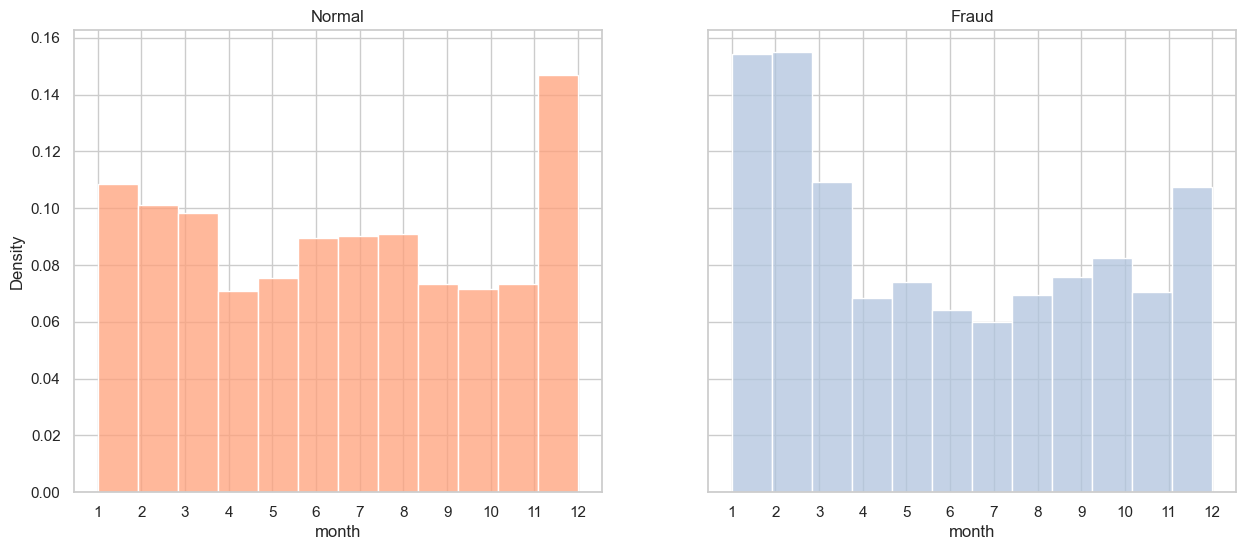

In [543]:
#Extracting the month from the 'trans_date_trans_time' column and assigning it to a new column 'month'
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month

#Creating subplots for the histograms
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

#Creating a histogram for non-fraudulent transactions
ax1 = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 0], stat="density", bins=12, ax=ax1, color="LightSalmon")

#Creating a histogram for fraudulent transactions
ax2 = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 1], stat="density", bins=12, ax=ax2, color="LightSteelBlue")

#Setting the titles for the subplots
ax1.set_title("Normal")
ax2.set_title("Fraud")

#Setting the x-axis tick marks for both subplots
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13))


We observe a distinct pattern in the hourly transactions, with fraudulent activities being more common around midnight compared to regular transactions. Let's apply a similar analysis to the months.

#trans_date_trans_time' feature are converted to:
 -time
 -month
 -year
 -days of week

In [544]:
#  Converting data type of trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df.dtypes['trans_date_trans_time']

# Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
df['time'] = df['trans_date_trans_time'].dt.strftime('%H:%M:%S')
df['time']

0          00:00:00
1          00:00:00
2          00:00:00
3          00:01:00
4          00:03:00
             ...   
1604289    23:59:00
1604290    23:59:00
1604291    23:59:00
1604292    23:59:00
1604293    23:59:00
Name: time, Length: 1604294, dtype: object

#'trans_date_trans_time' feature are converted to days of week

In [545]:
#Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
             ...   
1604289    Thursday
1604290    Thursday
1604291    Thursday
1604292    Thursday
1604293    Thursday
Name: day_of_week, Length: 1604294, dtype: object

#'trans_date_trans_time' feature are converted to month, year

In [546]:
#Derive 'month - year' feature
df['Month']  = pd.DatetimeIndex(df['trans_date_trans_time']).month
df['Year'] = pd.DatetimeIndex(df['trans_date_trans_time']).year

observation:
All these features are extracted for generating more and better insights of dataset

2.7.5 merchant vs home location (lat, long)
distance between merchant and home location Calculated

In [547]:
#Distance between merchant and home location Calculated, Calculate distance between merchant and home location, 
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))
df['longitudinal_distance']

0          0.870
1          0.024
2          0.108
3          0.447
4          0.830
           ...  
1604289    0.558
1604290    0.747
1604291    0.813
1604292    0.632
1604293    0.443
Name: longitudinal_distance, Length: 1604294, dtype: float64

3. One-hot encoding

3.1 category column

In [548]:
# One-hot encoding the 'category' column in the DataFrame 'df' and adding a prefix 'category' to the new columns
df = pd.get_dummies(df, columns=['category'], prefix='category')

# Reindexing the DataFrame 'df' with the same columns and filling missing values with 0
df = df.reindex(columns=df.columns, fill_value=0)

We transformed each unique category into separate columns, resulting in the creation of 14 new columns from the initial 'category' column, which had 14 distinct values.

In [549]:
# Convert categorical column into numerical 
df['category_entertainment']=df['category_entertainment'].astype(int)
df['category_kids_pets']=df['category_kids_pets'].astype(int)
df['category_shopping_pos']=df['category_shopping_pos'].astype(int)
df['category_travel']=df['category_travel'].astype(int)
df['category_health_fitness']=df['category_health_fitness'].astype(int)
df['category_home']=df['category_home'].astype(int)
df['category_misc_pos']=df['category_misc_pos'].astype(int)
df['category_shopping_net']=df['category_shopping_net'].astype(int)
df['category_gas_transport']=df['category_gas_transport'].astype(int)
df['category_misc_net']=df['category_misc_net'].astype(int)
df['category_grocery_net']=df['category_grocery_net'].astype(int)
df['category_kids_pets']=df['category_kids_pets'].astype(int)
df['category_personal_care'] = df['category_personal_care'].astype(int)
df['category_grocery_pos'] = df['category_grocery_pos'].astype(int)

In [550]:
# Convert gender into numerical 
df.gender=df.gender.apply(lambda x: 1 if x=="M" else 0)

converting column values to 1 and 0.
 -1 for male
 -0 for female

We dropped all columns that didn't contain significant information. Now, we can proceed to split the test and train data.

In [551]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

Spliting the data into
 -features (X)
 -target (y)

In [552]:
# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1283435, 43), (320859, 43), (1283435,), (320859,))

As we observed earlier, the target class in this problem is heavily skewed. With only 0.6% of the occurrences being the event of interest, if we were to blindly predict that every transaction is not fraudulent, we would still achieve a high accuracy of 99.4% due to the overwhelming majority of non-fraudulent transactions.

This high accuracy stems from the fact that the model would correctly classify the vast majority of non-fraudulent transactions, which constitute 99.4% of the dataset. Therefore, relying solely on accuracy as an evaluation metric can be misleading.

Instead, it is essential to consider other metrics such as Precision, Recall, F1-score, ROC Curves, and AUC to comprehensively assess the model's performance.

First, let's drop some columns that has duplicated or not useful information

In [553]:
columns_drop = ['trans_num','unix_time','first','last','street','zip','age_group','day_of_week', 'state','time','Unnamed: 0','cc_num','merchant','trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long']

#Use the drop method to remove the specified columns
df = df.drop(columns=columns_drop)

We dropped the columns that didn't contain crucial information, allowing us to proceed with splitting the test and train data.

We saw that the "amt" category has very little spacing between small numbers and large spacing between high numbers. Because of that, we are going to use non logarithm scaling, that increases the distance between small values and reduces de spacing between large ones.

3.2 Scaling

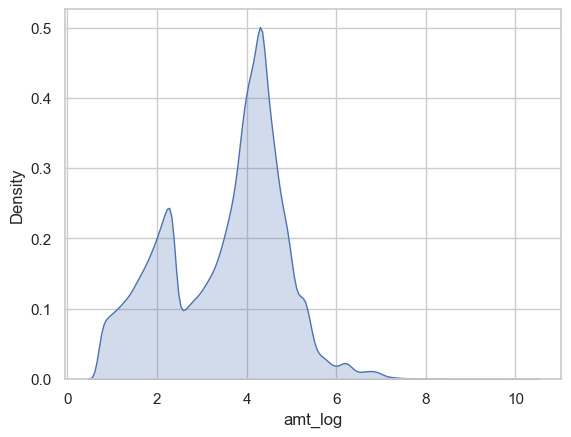

In [554]:
#Applying the natural logarithm transformation to the 'amt' column in the 'train_data' DataFrame and storing it in a new column 'amt_log'
train_data["amt_log"] = np.log1p(train_data["amt"])

#Creating a kernel density estimation (KDE) plot for the 'amt_log' column
sns.kdeplot(train_data["amt_log"], fill=True);

We will examine the normality of the 'amt' feature in comparison to its transformation, 'amt_log'.

In [555]:
#Defining a function named check_normality that takes a feature as input
def check_normality(feature):
    #Creating a new figure for plotting
    plt.figure(figsize=(8, 8))

    #Creating a subplot for the Q-Q plot using the specified feature from the 'train_data' DataFrame
    ax1 = plt.subplot(1, 1, 1)
    stats.probplot(train_data[feature], dist=stats.norm, plot=ax1)

    #Setting the title for the Q-Q plot
    ax1.set_title(f'{feature} Q-Q plot', fontsize=20)

    #Removing the top and right spines from the plot
    sns.despine()

    #Calculating the mean, standard deviation, and skewness of the specified feature in the 'train_data' DataFrame
    mean = train_data[feature].mean()
    std = train_data[feature].std()
    skew = train_data[feature].skew()

    #Printing the mean, standard deviation, and skewness of the feature
    print(f'{feature} : mean: {mean:.2f}, std: {std:.2f}, skew: {skew:.2f}')


amt : mean: 70.28, std: 159.95, skew: 41.91


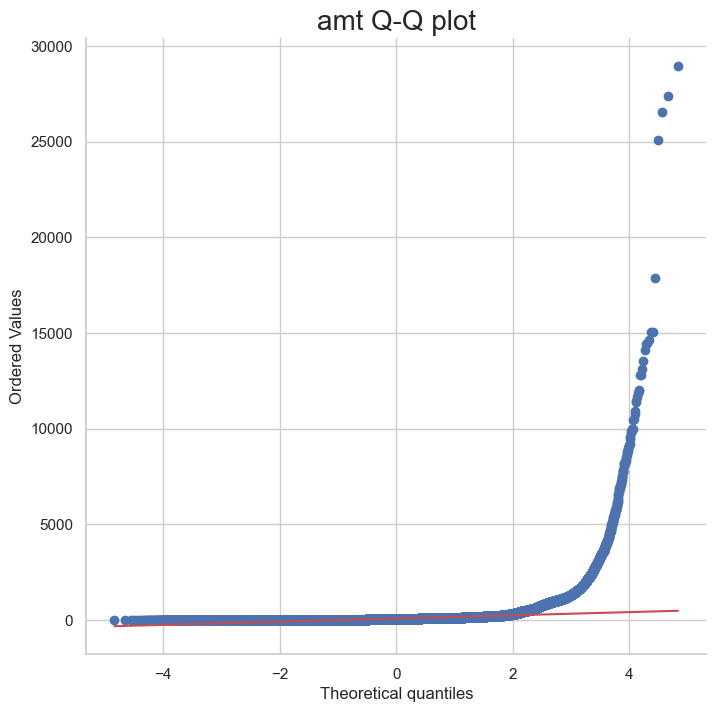

In [556]:
check_normality("amt");

amt_log : mean: 3.53, std: 1.29, skew: -0.30


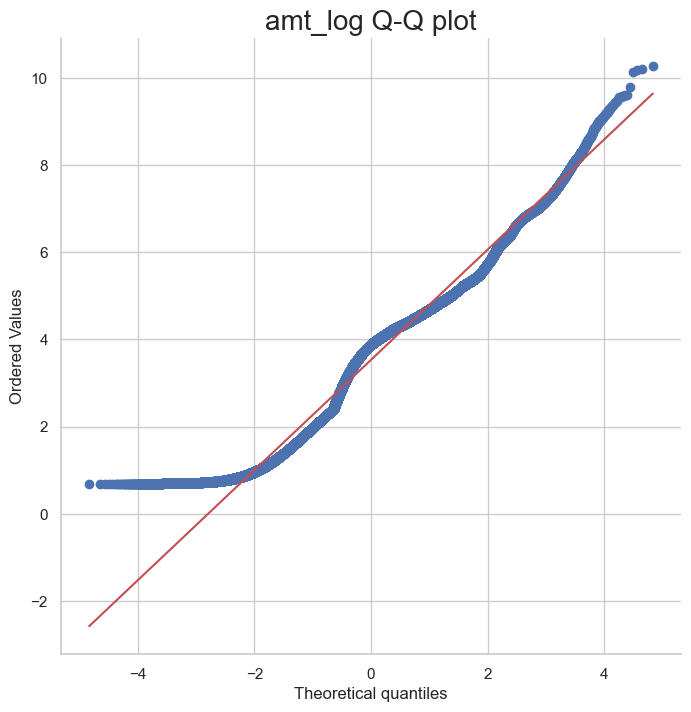

In [557]:
check_normality("amt_log");

We observe a significant improvement in skewness with the logarithmic scaling.

Categorical Encoding: Given the presence of a binary target and categorical variables with high cardinality, we will employ the WOE (Weight of Evidence) encoder for the following features: category, state, city, and job.

In [558]:
#Defining a function named apply_woe that takes the 'train_data', a list of 'columns' to encode, and the 'target_col' as inputs
def apply_woe(train_data, columns, target_col):
    #Instantiating a WOEEncoder object
    woe = ce.WOEEncoder()

    #Looping through the specified 'columns' to apply the WOE encoding
    for col in columns:
        X = train_data[col]  # Selecting the column to be encoded
        y = train_data[target_col]  # Selecting the target column

        #Creating a new column name for the encoded feature
        new_col_name = f"{col}_WOE"

        #Applying the WOE encoding to the selected column and adding the result as a new column in the DataFrame
        train_data[new_col_name] = woe.fit_transform(X, y)

    #Returning the updated train_data DataFrame
    return train_data

#Specifying the columns to be encoded and the target column
columns_to_encode = ["category", "state", "city", "job"]
target_column = "is_fraud"

#Applying the WOE encoding to the specified columns in the train_data DataFrame
train = apply_woe(train_data, columns_to_encode, target_column)


For the 'gender' category, we can easily encode it using dummy variables.

In [559]:
#Defining a dictionary to map the values in the 'gender' column to binary values
gender_mapping = {"F": 0, "M": 1}

#Creating a new column 'gender_binary' in the 'train' DataFrame based on the mapping of values from the 'gender' column
train["gender_binary"] = train["gender"].map(gender_mapping)


We can encode the 'cc_num' (credit card number) variable by calculating their frequencies in the database and then dividing them into classes. This way, we can categorize the cards based on their usage frequency, distinguishing between those that are frequently used and those that are rarely used in the database.

In [560]:
#Calculating the frequency of occurrences for each credit card number (cc_num) in the 'train' DataFrame
freq_enc = (train.groupby("cc_num").size())

#Sorting the frequencies in ascending order
freq_enc.sort_values(ascending=True)

#Applying the frequency values to a new column 'cc_num_frequency' based on the credit card numbers (cc_num) in the 'train' DataFrame
train["cc_num_frequency"] = train["cc_num"].apply(lambda x: freq_enc[x])


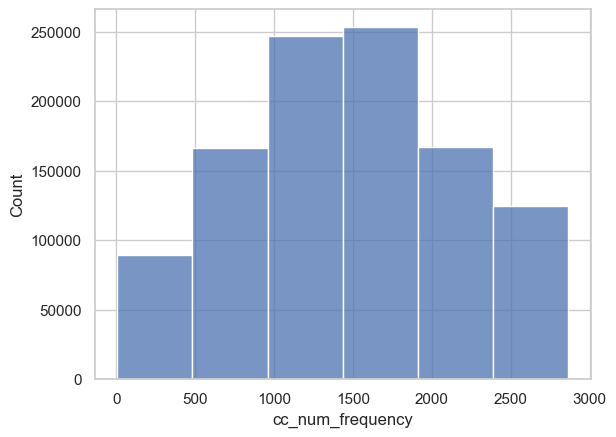

In [561]:
#Creating a histogram plot using Seaborn for the 'cc_num_frequency' column in the 'train' DataFrame with 6 bins
sns.histplot(train["cc_num_frequency"], bins=6);

In [562]:
#Defining a list of intervals for classifying the frequency values
intervals = [600, 1200, 1800, 2400, 3000, 3600]

#Defining a function named classify_frequency that takes a frequency value 'freq' as input
def classify_frequency(freq):
    #Iterating through the intervals and their corresponding indices using the enumerate function
    for i, c in enumerate(intervals):
        #Checking if the frequency value 'freq' is less than or equal to the current interval value 'c'
        if freq <= c:
            #Returning the index 'i' as the classification for the frequency value
            return i

#Applying the classify_frequency function to the 'cc_num_frequency' column and creating a new column 'cc_num_frequency_classification' in the 'train' DataFrame
train["cc_num_frequency_classification"] = train["cc_num_frequency"].apply(classify_frequency)


We will examine whether the distributions vary across the frequency classes for both fraudulent and non-fraudulent transactions.

Text(0.5, 1.0, 'Fraud')

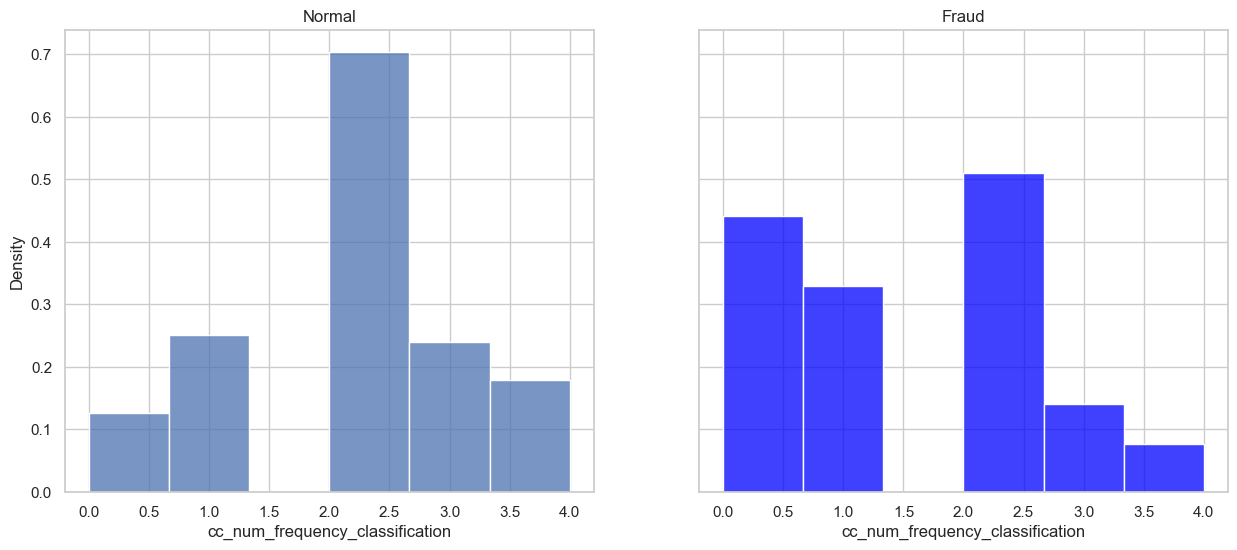

In [563]:
#Creating a figure with two subplots for visual comparison
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

#Creating a histogram plot for the 'cc_num_frequency_classification' column in the 'train' DataFrame for non-fraudulent transactions (is_fraud=0)
ax1 = sns.histplot(x='cc_num_frequency_classification', data=train[train["is_fraud"] == 0], stat="density", bins=6, ax=ax1)

#Creating a histogram plot for the 'cc_num_frequency_classification' column in the 'train' DataFrame for fraudulent transactions (is_fraud=1)
ax2 = sns.histplot(x='cc_num_frequency_classification', data=train[train["is_fraud"] == 1], stat="density", bins=6, ax=ax2, color="blue")

#Setting titles for the subplots
ax1.set_title("Normal")
ax2.set_title("Fraud")


We observe a clear pattern in the data. Incidents of fraud are more likely to occur with credit cards that have lower usage, possibly newer ones. In contrast, normal transactions follow a more typical, normal distribution pattern.

Undersampling
Due to the highly imbalanced nature of our data, we will employ undersampling to address this issue. Specifically, we will utilize the RandomUnderSampler method to balance the dataset in our analysis.

In [564]:
#Creating the feature matrix X by dropping the 'is_fraud' column from the 'train' DataFrame
X = train.drop(columns=["is_fraud"])

#Creating the target vector y by selecting the 'is_fraud' column from the 'train' DataFrame
y = train["is_fraud"]


In [565]:
#Instantiating a RandomUnderSampler object with the specified sampling strategy and random state
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=23)

In [566]:
#Applying the RandomUnderSampler to the feature matrix X and target vector y
X_undersampled, y_undersampled = rus.fit_resample(X, y)

Check the class proportion after the undersampling process.

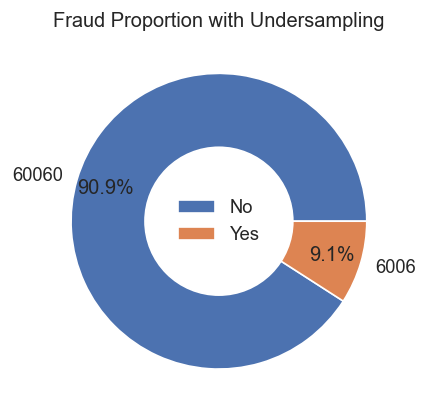

In [567]:
#Generate a doughnut chart based on the undersampled target values
doughnut_char = y_undersampled.value_counts().reset_index()
doughnut_char.columns = ['is_fraud', 'count']

#Define labels for the chart
labels = ["No", "Yes"]

#Set parameters for the chart
explode = (0, 0)
colors = ['DarkSalmon', 'LightSteelBlue']

#Create the figure and axis for the plot
fig, ax = plt.subplots(dpi=120, figsize=(8, 4))

#Create the pie chart with the specified parameters
plt.pie(doughnut_char["count"],
        labels=doughnut_char["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

#Add a white circle to the center of the chart
centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Set the title for the chart
plt.title("Fraud Proportion with Undersampling")

#Add a legend to the chart
plt.legend(labels, loc="center", frameon=False)

#Display the chart
plt.show()


Feature Importance: To assess the feature importance, we will create two random vectors for comparison. If a feature exhibits lower importance compared to a random vector, it may indicate that the feature is not beneficial for the model.

In [568]:
#Generating two random feature vectors for comparison
X_undersampled["random_feat_1"] = np.random.randint(0, 100, size=len(X_undersampled))
X_undersampled["random_feat_2"] = np.random.randint(0, 500, size=len(X_undersampled))

In [569]:
#Creating the training feature matrix X_train by dropping specific columns from the X_undersampled DataFrame
X_train = X_undersampled.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "merchant", "category", "amt", "first", "last", "gender", "street", "city", "state", "zip", "lat", "long", "city_pop", "job", "dob", "trans_num", "unix_time", "merch_lat", "merch_long"])

#Creating the training target vector y_train using the y_undersampled values
y_train = y_undersampled

#Printing the columns of the X_undersampled DataFrame
print(X_undersampled.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'hour', 'month', 'amt_log',
       'category_WOE', 'state_WOE', 'city_WOE', 'job_WOE', 'gender_binary',
       'cc_num_frequency', 'cc_num_frequency_classification', 'random_feat_1',
       'random_feat_2'],
      dtype='object')


In [570]:
X_train.head()

,age,hour,month,amt_log,category_WOE,state_WOE,city_WOE,job_WOE,gender_binary,cc_num_frequency,cc_num_frequency_classification,random_feat_1,random_feat_2
484568,33,1,7,4.788741,0.900512,-0.115350,-0.046432,0.155156,0,1643,2,32,40
247469,69,9,5,4.917789,0.900512,-0.065891,-0.451285,0.592501,0,1639,2,54,322
611505,51,16,9,3.407842,-1.335295,0.017116,0.097905,-0.206726,0,1229,2,34,17
849882,26,13,12,3.189653,-0.853714,0.063669,-0.086836,0.286408,1,2091,3,12,31
271414,66,0,5,2.078191,0.940474,-0.034936,-1.953526,-0.865976,1,1223,2,86,335


We'll employ the Boruta algorithm along with random forests' feature importances to determine the features to be utilized in our model.

In [571]:
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np


#Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the dataset
for column in X_train.columns:
    if X_train[column].dtype == object:
        X_train[column] = label_encoder.fit_transform(X_train[column])

#After encoding, proceed with the rest of your code

#Define the list of categorical columns
cat_columns = ['trans_date_trans_time', 'city', 'state', 'category', 'gender', 'dob', 'job', 'cc_num', 'amt']

#Check if the columns exist in X_train
if all(col in X_train.columns for col in cat_columns):
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse=False)

    #Encode the categorical columns
    X_train_encoded = encoder.fit_transform(X_train[cat_columns])

    #Concatenate the encoded data with the numerical columns
    X_train_processed = np.concatenate([X_train_encoded, X_train.drop(columns=cat_columns)], axis=1)

    #Now, you can use X_train_processed in the BorutaPy algorithm
    rf = RandomForestClassifier(random_state=23, max_depth=5)
    feat_selector = BorutaPy(rf, n_estimators="auto", random_state=999)
    result_boruta = feat_selector.fit(X_train_processed, y_train)
    accept = X_train.columns[feat_selector.support_].to_list()
    irresolution = X_train.columns[feat_selector.support_weak_].to_list()

    print("Features selected:")
    print(list(accept))
else:
    print("The specified columns are not found in X_train.")


The specified columns are not found in X_train.


Then check feature importance with Random Forest.

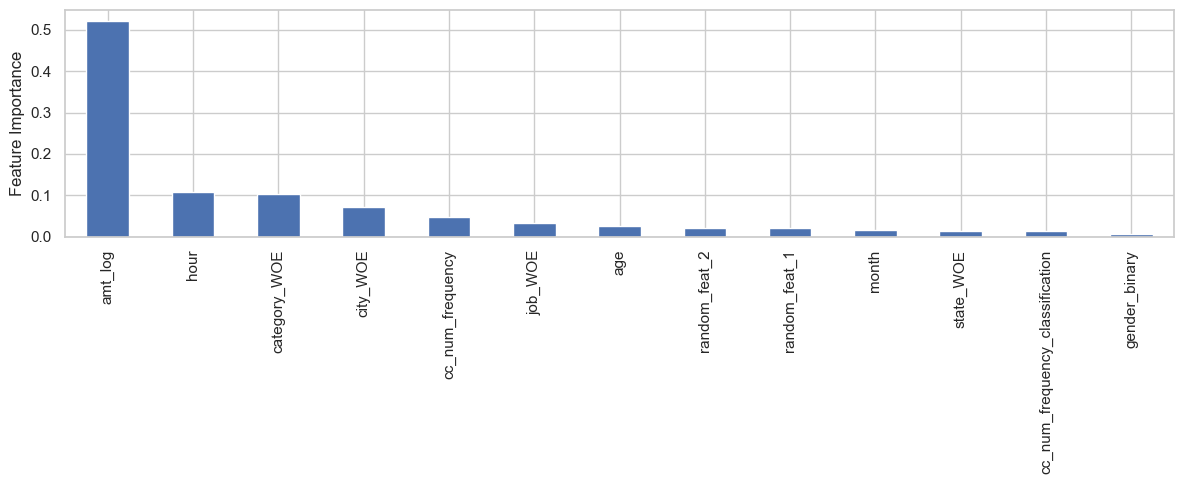

In [572]:
from sklearn.impute import SimpleImputer

#Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies here
X_train_imputed = imputer.fit_transform(X_train)

#Now you can fit the model with the imputed data
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout()


We now proceed to select our features. As 'cc_num_frequency' and 'cc_num_frequency_classification' provide the same information, we will drop the less significant one.

In [573]:
#Dropping specific columns from the X_train DataFrame
X_train.drop(columns=["gender_binary", "state_WOE", "month", "cc_num_frequency_classification", "random_feat_1", "random_feat_2"], inplace=True)

In [574]:
X_train.head()

,age,hour,amt_log,category_WOE,city_WOE,job_WOE,cc_num_frequency
484568,33,1,4.788741,0.900512,-0.046432,0.155156,1643
247469,69,9,4.917789,0.900512,-0.451285,0.592501,1639
611505,51,16,3.407842,-1.335295,0.097905,-0.206726,1229
849882,26,13,3.189653,-0.853714,-0.086836,0.286408,2091
271414,66,0,2.078191,0.940474,-1.953526,-0.865976,1223


Here are the final features that will be included in the model.

4. Preparing test data

We will apply the same transformations to the test data.

In [575]:
# Reading the test data from the specified file path
test = pd.read_csv("../Credit-Card-Transactions-Fraud-Detection-Cat/fraudTest.csv", index_col=0)

# Creating the 'age' feature by subtracting the birth year from the current year
test['age'] = dt.date.today().year - pd.to_datetime(test['dob']).dt.year

# Creating the 'hour' and 'month' features from the 'trans_date_trans_time' column
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['month'] = pd.to_datetime(test['trans_date_trans_time']).dt.month

# Dropping specific columns from the test DataFrame
test.drop(columns=["merchant", "first", "last", "street", "unix_time", "trans_num"], inplace=True)

# Applying the logarithm transformation to the 'amt' column
test["amt_log"] = np.log1p(test["amt"])

# Applying WOE encoding, binary encoding, and frequency encoding to the test DataFrame
test = apply_woe(test, columns_to_encode, target_column)
test["gender_binary"] = test["gender"].map(gender_mapping)
freq_enc_test = (test.groupby("cc_num").size())
freq_enc_test.sort_values(ascending=True)
test["cc_num_frequency"] = test["cc_num"].apply(lambda x: freq_enc_test[x])
test["cc_num_frequency_classification"] = test["cc_num_frequency"].apply(classify_frequency)

# Creating the test feature matrix X_test and the target vector y_test by dropping specific columns from the test DataFrame
X_test = test.drop(columns=["trans_date_trans_time", "city", "state", "category", "gender", "dob", "job", "cc_num", "amt", "merch_lat", "is_fraud"])
y_test = test["is_fraud"]

# Dropping additional specific columns from the X_test DataFrame
X_test.drop(columns=["gender_binary", "state_WOE", "zip", "long", "lat", "city_pop", "month"], inplace=True)


Preparing validation data: To fine-tune our hyperparameters, we will split our training set into training and validation sets.

In [576]:
#Splitting the training data into training and validation sets for model validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

Training the model: Initially, we'll define a function to aid in the evaluation of our models.

In [577]:
#Defining a function to evaluate the model performance
def evaluate_model(target, predicted, y_score, normalize_matrix=None):
    #Calculating various metrics to evaluate model performance
    accuracy = metrics.accuracy_score(target, predicted)
    precision = metrics.precision_score(target, predicted)
    recall = metrics.recall_score(target, predicted)
    f1 = f1_score(target, predicted)
    auc = metrics.roc_auc_score(target, y_score)

    #Generating and displaying the confusion matrix
    confusion_matrix = metrics.confusion_matrix(target, predicted, normalize=normalize_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    #Plotting the ROC curve
    fpr, tpr, threshold = roc_curve(target, y_score)
    plt.plot(fpr, tpr, label="Model", c="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", c="yellow")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    #Printing the evaluation metrics
    print("Accuracy:", accuracy.round(2))
    print("Precision:", precision.round(2))
    print("Recall:", recall.round(2))
    print("F1 Score:", f1.round(2))
    print("AUC:", auc)

    #Returning None as the function has no specific return value
    return None


Now, we'll conduct several tests to determine which models are potentially the most suitable for our problem.Now we'll run some tests on which models potentially runs best for our model.

In [578]:
#Initializing different classifiers for testing
rf = RandomForestClassifier(random_state=23)  # Random Forest Classifier
knn = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
gboost = GradientBoostingClassifier(random_state=23)  # Gradient Boosting Classifier
lgbm = LGBMClassifier(random_state=23)  # LightGBM Classifier
LR = LogisticRegression(random_state=42) #Logistic Regression Classifier

5. Modeling

Examine the results of the models without any tuning.

In [579]:
#Dropping additional specific columns from the X_test DataFrame
columns_to_drop = ["gender_binary", "state_WOE", "zip", "long", "lat", "city_pop", "month", "cc_num_frequency_classification", "merch_long"]
columns_existing = [col for col in columns_to_drop if col in X_test.columns]
X_test.drop(columns=columns_existing, inplace=True)

#Fitting the Random Forest classifier to the training data
rf.fit(X_train, y_train)

#Predicting the target values for the training data
y_pred_train = rf.predict(X_train)
#Obtaining the predicted probabilities for the training data
y_score_train = rf.predict_proba(X_train)[:, 1]

#Predicting the target values for the test data
y_pred_test = rf.predict(X_test)
#Obtaining the predicted probabilities for the test data
y_score_test = rf.predict_proba(X_test)[:, 1]


In [580]:
from sklearn import metrics

#Function to evaluate the performance of a classification model
def evaluate_model(target, predicted, y_score, normalize_matrix=None):
    #Compute the accuracy score
    accuracy = metrics.accuracy_score(target, predicted)
    
    #Compute the precision score
    precision = metrics.precision_score(target, predicted)
    
    #Compute the recall score
    recall = metrics.recall_score(target, predicted)
    
    #Compute the F1 score
    f1 = metrics.f1_score(target, predicted)
    
    #Compute the AUC score
    auc = metrics.roc_auc_score(target, y_score)

    #Print the computed evaluation metrics
    print(f"Accuracy: {accuracy}")  # Print the accuracy score
    print(f"Precision: {precision}")  # Print the precision score
    print(f"Recall: {recall}")  # Print the recall score
    print(f"F1 Score: {f1}")  # Print the F1 score
    print(f"AUC Score: {auc}")  # Print the AUC score

#Call the modified function with the appropriate parameters
#Evaluate the model using the training data
evaluate_model(y_train[:len(y_pred_train)], y_pred_train, y_score_train)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


5.1 KNN Model

In [581]:
#Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN classifier
knn = KNeighborsClassifier()

#Fit the KNN model using the training data
knn.fit(X_train, y_train)

#Predict the target values for the training data using the trained KNN model
y_pred_train = knn.predict(X_train)

#Calculate the predicted probabilities for the training data
#For binary classification, this returns the probability estimates for the positive class
y_score_train = knn.predict_proba(X_train)[:, 1]

#Predict the target values for the test data using the trained KNN model
y_pred_test = knn.predict(X_test)

#Calculate the predicted probabilities for the test data
#For binary classification, this returns the probability estimates for the positive class
y_score_test = knn.predict_proba(X_test)[:, 1]

#Print the shapes of the predicted values and scores for both the training and test data
print(f"Training data - Predicted values shape: {y_pred_train.shape}, Predicted scores shape: {y_score_train.shape}")
print(f"Test data - Predicted values shape: {y_pred_test.shape}, Predicted scores shape: {y_score_test.shape}")


Training data - Predicted values shape: (52852,), Predicted scores shape: (52852,)
Test data - Predicted values shape: (555719,), Predicted scores shape: (555719,)


In [582]:
#Evaluate the model using the train data
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy: 0.9631991220767426
Precision: 0.9238292827504446
Recall: 0.6486992715920916
F1 Score: 0.7621958674654603
AUC Score: 0.9866181477220308


In [583]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

Accuracy: 0.9431943122333409
Precision: 0.032478469507738264
Recall: 0.47645687645687645
F1 Score: 0.06081161489944067
AUC Score: 0.7562307974348642


5.2 Gradient Boosting model

In [584]:
#Import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

#Create a Gradient Boosting classifier
gboost = GradientBoostingClassifier()

#Fit the Gradient Boosting model using the training data
gboost.fit(X_train, y_train)

#Predict the target values for the training data using the trained Gradient Boosting model
y_pred_train = gboost.predict(X_train)

#Calculate the predicted probabilities for the training data
#For binary classification, this returns the probability estimates for the positive class
y_score_train = gboost.predict_proba(X_train)[:, 1]

#Predict the target values for the test data using the trained Gradient Boosting model
y_pred_test = gboost.predict(X_test)

#Calculate the predicted probabilities for the test data
#For binary classification, this returns the probability estimates for the positive class
y_score_test = gboost.predict_proba(X_test)[:, 1]

#Print the shapes of the predicted values and scores for both the training and test data
print(f"Training data - Predicted values shape: {y_pred_train.shape}, Predicted scores shape: {y_score_train.shape}")
print(f"Test data - Predicted values shape: {y_pred_test.shape}, Predicted scores shape: {y_score_test.shape}")


Training data - Predicted values shape: (52852,), Predicted scores shape: (52852,)
Test data - Predicted values shape: (555719,), Predicted scores shape: (555719,)


In [585]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy: 0.9837849088019375
Precision: 0.9508908177249886
Recall: 0.8663891779396462
F1 Score: 0.9066753784166395
AUC Score: 0.9943358617787685


In [586]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

Accuracy: 0.9942416940935976
Precision: 0.3922369765066394
Recall: 0.8951048951048951
F1 Score: 0.5454545454545454
AUC Score: 0.9942820185302671


5.3 LightGBM model 

In [587]:
#Import the necessary libraries
import lightgbm as lgb

#Create a LightGBM classifier
lgbm = lgb.LGBMClassifier()

#Fit the LightGBM model using the training data
lgbm.fit(X_train, y_train)

#Predict the target values for the training data using the trained LightGBM model
y_pred_train = lgbm.predict(X_train)

#Calculate the predicted probabilities for the training data
#For binary classification, this returns the probability estimates for the positive class
y_score_train = lgbm.predict_proba(X_train)[:, 1]

#Predict the target values for the test data using the trained LightGBM model
y_pred_test = lgbm.predict(X_test)

#Calculate the predicted probabilities for the test data
#For binary classification, this returns the probability estimates for the positive class
y_score_test = lgbm.predict_proba(X_test)[:, 1]

#Print the shapes of the predicted values and scores for both the training and test data
print(f"Training data - Predicted values shape: {y_pred_train.shape}, Predicted scores shape: {y_score_train.shape}")
print(f"Test data - Predicted values shape: {y_pred_test.shape}, Predicted scores shape: {y_score_test.shape}")


[LightGBM] [Info] Number of positive: 4805, number of negative: 48047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090914 -> initscore=-2.302523
[LightGBM] [Info] Start training from score -2.302523
Training data - Predicted values shape: (52852,), Predicted scores shape: (52852,)
Test data - Predicted values shape: (555719,), Predicted scores shape: (555719,)


In [588]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy: 0.9950427609172784
Precision: 0.9809443150539912
Recall: 0.96420395421436
F1 Score: 0.9725020990764064
AUC Score: 0.9997714538402791


In [589]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

Accuracy: 0.9948805061550892
Precision: 0.4232792634809294
Recall: 0.9002331002331002
F1 Score: 0.575816311316535
AUC Score: 0.9960766011257906


5.4 Logistic Regression Model

In [590]:
#Create and train a Logistic Regression model on the non-oversampled data
lr_non_oversampled = LogisticRegression(random_state=42)
lr_non_oversampled.fit(X_train, y_train)

C:\Users\User_Win10x64\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [591]:
#Predict probabilities on the non-oversampled test set
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]

#Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_lr)


In [592]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy: 0.9950427609172784
Precision: 0.9809443150539912
Recall: 0.96420395421436
F1 Score: 0.9725020990764064
AUC Score: 0.9997714538402791


In [593]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

Accuracy: 0.9948805061550892
Precision: 0.4232792634809294
Recall: 0.9002331002331002
F1 Score: 0.575816311316535
AUC Score: 0.9960766011257906


5.5 Random Forest Model

In [594]:
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_score_train = rf.predict_proba(X_train)[:,1]

y_pred_test = rf.predict(X_test)
y_score_test = rf.predict_proba(X_test)[:,1] 

In [595]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


In [596]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

Accuracy: 0.9949812765084513
Precision: 0.42844444444444446
Recall: 0.8988344988344988
F1 Score: 0.5802859292701279
AUC Score: 0.9951081437551178


6.Conclusion

After evaluating five models, LightGBM and GradientBoost performed exceptionally well. 